<a href="https://colab.research.google.com/github/vikash09082003/PROPHET_PROJECT/blob/main/prophet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
from google.colab import files
ulpoadded = files.upload()

Saving example_yosemite_temps.csv to example_yosemite_temps.csv


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('example_yosemite_temps.csv')
df.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


In [ ]:
from prophet  import Prophet


In [ ]:
m= Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7esgsab/55y_32sc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz7esgsab/pxzo_jqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1243', 'data', 'file=/tmp/tmpz7esgsab/55y_32sc.json', 'init=/tmp/tmpz7esgsab/pxzo_jqy.json', 'output', 'file=/tmp/tmpz7esgsab/prophet_modeljkcdrgaf/prophet_model-20250216090959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:10:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=1200,freq="MS")

In [ ]:
future.tail()

,ds
19916,2117-03-01
19917,2117-04-01
19918,2117-05-01
19919,2117-06-01
19920,2117-07-01


In [ ]:
future.head()

,ds
0,2017-05-01 00:00:00
1,2017-05-01 00:05:00
2,2017-05-01 00:10:00
3,2017-05-01 00:15:00
4,2017-05-01 00:20:00


In [ ]:
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-01 00:00:00,16.088318,2.197816e+01,3.308291e+01,1.608832e+01,1.608832e+01,11.563160,11.563160,11.563160,11.584806,11.584806,11.584806,-0.021646,-0.021646,-0.021646,0.0,0.0,0.0,27.651478
1,2017-05-01 00:05:00,16.091088,2.134503e+01,3.295075e+01,1.609109e+01,1.609109e+01,11.120695,11.120695,11.120695,11.144967,11.144967,11.144967,-0.024273,-0.024273,-0.024273,0.0,0.0,0.0,27.211782
2,2017-05-01 00:10:00,16.093857,2.124284e+01,3.242878e+01,1.609386e+01,1.609386e+01,10.668434,10.668434,10.668434,10.695352,10.695352,10.695352,-0.026918,-0.026918,-0.026918,0.0,0.0,0.0,26.762292
3,2017-05-01 00:15:00,16.096626,2.080426e+01,3.190206e+01,1.609663e+01,1.609663e+01,10.207020,10.207020,10.207020,10.236601,10.236601,10.236601,-0.029580,-0.029580,-0.029580,0.0,0.0,0.0,26.303647
4,2017-05-01 00:20:00,16.099396,2.030927e+01,3.164037e+01,1.609940e+01,1.609940e+01,9.737137,9.737137,9.737137,9.769397,9.769397,9.769397,-0.032260,-0.032260,-0.032260,0.0,0.0,0.0,25.836533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,2117-03-01 00:00:00,-10443.958475,-3.477914e+06,3.410517e+06,-3.477930e+06,3.410509e+06,11.563160,11.563160,11.563160,11.584806,11.584806,11.584806,-0.021646,-0.021646,-0.021646,0.0,0.0,0.0,-10432.395315
19917,2117-04-01 00:00:00,-10452.873499,-3.483674e+06,3.417838e+06,-3.483684e+06,3.417829e+06,11.567783,11.567783,11.567783,11.584806,11.584806,11.584806,-0.017023,-0.017023,-0.017023,0.0,0.0,0.0,-10441.305716
19918,2117-05-01 00:00:00,-10461.500942,-3.489494e+06,3.425054e+06,-3.489510e+06,3.425047e+06,11.269124,11.269124,11.269124,11.584806,11.584806,11.584806,-0.315682,-0.315682,-0.315682,0.0,0.0,0.0,-10450.231818
19919,2117-06-01 00:00:00,-10470.415967,-3.495292e+06,3.432273e+06,-3.495305e+06,3.432260e+06,11.231880,11.231880,11.231880,11.584806,11.584806,11.584806,-0.352926,-0.352926,-0.352926,0.0,0.0,0.0,-10459.184086


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-01 00:00:00,16.088318,21.978162,33.082907,16.088318,16.088318,11.563160,11.563160,11.563160,11.584806,11.584806,11.584806,-0.021646,-0.021646,-0.021646,0.0,0.0,0.0,27.651478
1,2017-05-01 00:05:00,16.091088,21.345034,32.950751,16.091088,16.091088,11.120695,11.120695,11.120695,11.144967,11.144967,11.144967,-0.024273,-0.024273,-0.024273,0.0,0.0,0.0,27.211782
2,2017-05-01 00:10:00,16.093857,21.242838,32.428776,16.093857,16.093857,10.668434,10.668434,10.668434,10.695352,10.695352,10.695352,-0.026918,-0.026918,-0.026918,0.0,0.0,0.0,26.762292
3,2017-05-01 00:15:00,16.096626,20.804262,31.902062,16.096626,16.096626,10.207020,10.207020,10.207020,10.236601,10.236601,10.236601,-0.029580,-0.029580,-0.029580,0.0,0.0,0.0,26.303647
4,2017-05-01 00:20:00,16.099396,20.309271,31.640368,16.099396,16.099396,9.737137,9.737137,9.737137,9.769397,9.769397,9.769397,-0.032260,-0.032260,-0.032260,0.0,0.0,0.0,25.836533


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19916,2117-03-01,-10443.958475,-3.477914e+06,3.410517e+06,-3.477930e+06,3.410509e+06,11.563160,11.563160,11.563160,11.584806,11.584806,11.584806,-0.021646,-0.021646,-0.021646,0.0,0.0,0.0,-10432.395315
19917,2117-04-01,-10452.873499,-3.483674e+06,3.417838e+06,-3.483684e+06,3.417829e+06,11.567783,11.567783,11.567783,11.584806,11.584806,11.584806,-0.017023,-0.017023,-0.017023,0.0,0.0,0.0,-10441.305716
19918,2117-05-01,-10461.500942,-3.489494e+06,3.425054e+06,-3.489510e+06,3.425047e+06,11.269124,11.269124,11.269124,11.584806,11.584806,11.584806,-0.315682,-0.315682,-0.315682,0.0,0.0,0.0,-10450.231818
19919,2117-06-01,-10470.415967,-3.495292e+06,3.432273e+06,-3.495305e+06,3.432260e+06,11.231880,11.231880,11.231880,11.584806,11.584806,11.584806,-0.352926,-0.352926,-0.352926,0.0,0.0,0.0,-10459.184086
19920,2117-07-01,-10479.043410,-3.501171e+06,3.437817e+06,-3.501181e+06,3.437801e+06,11.567783,11.567783,11.567783,11.584806,11.584806,11.584806,-0.017023,-0.017023,-0.017023,0.0,0.0,0.0,-10467.475626


In [ ]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
19909,2116-08-01,-10371.722087,-3.444562e+06,3.374356e+06
19910,2116-09-01,-10380.674355,-3.447510e+06,3.377447e+06
19911,2116-10-01,-10388.965895,-3.450458e+06,3.382215e+06
19912,2116-11-01,-10398.243687,-3.455781e+06,3.385884e+06
19913,2116-12-01,-10406.844266,-3.461279e+06,3.389160e+06
19914,2117-01-01,-10415.130214,-3.466759e+06,3.396256e+06
19915,2117-02-01,-10424.343035,-3.472303e+06,3.403349e+06
19916,2117-03-01,-10432.395315,-3.477914e+06,3.410517e+06
19917,2117-04-01,-10441.305716,-3.483674e+06,3.417838e+06
19918,2117-05-01,-10450.231818,-3.489494e+06,3.425054e+06


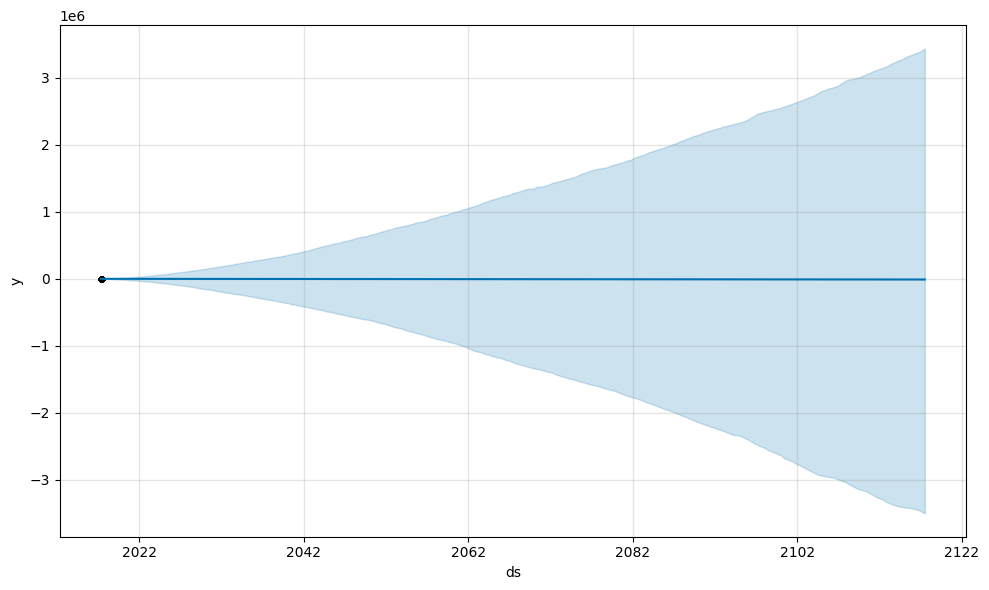

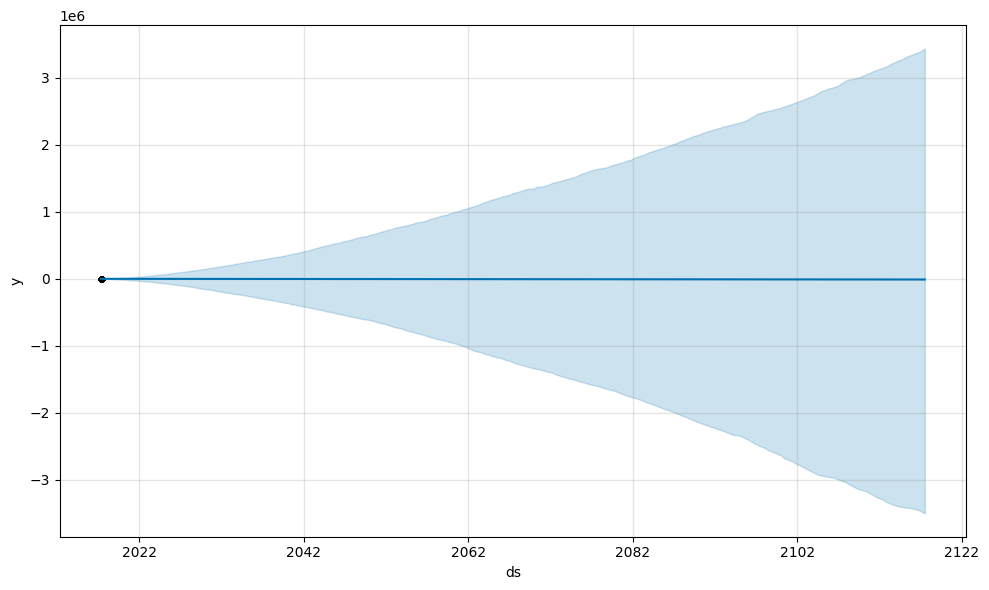

In [ ]:
m.plot(forecast)